# Import Library dan Upload Dataset

Proses awal dilakukan dengan melakukan import dari berbagai libraries yang diperlukan, melakukan instalasi, dan membaca file dataset dari keterlambatan penerbangan yang tersedia dalam format CSV.

In [116]:
# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [117]:
# %pip install --upgrade nbformat

In [118]:
# Code ini untuk menghilangkan warning message saat kita menjalankan code-code
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Membaca dataset CSV Airline Delay Cause
airline_data = pd.read_csv('Airline_Delay_Cause.csv')

 # Transforming for Analysis Process

Proses Transforming for Analysis dilakukan dengan tujuan untuk mempersiapkan dan menyempurnakan data yang didapat untuk analisis dan visualisasi. Pada data yang digunakan ini, terdapat sejumlah proses penyempurnaan yang dilakukan antara lain sebagai berikut.

````

## Transform Process 1: <i>Parsing Airport Variables</i>
Proses ini dilakukan dengan parsing variabel yang terdapat pada atribut kolom "airport_name" dengan mengekstraksi nama kota dan nama state menjadi dua kolom baru yang terpisah dari nama bandara karena data pada kolom tersebut memiliki tiga variabel yang berbeda dengan format yang parseable yaitu {kota tempat lokasi bandara}, {state tempat lokasi bandara}: {nama bandara}. Setelah dilakukan proses parsing, kolom "airport_name" yang awalnya hanya satu saja akan dibagi menjadi tiga kolom yaitu "airport_city", "airport_state", dan "airport_name".

In [120]:
airline_data[['airport_city', 'airport_state', 'airport_name']] = airline_data['airport_name'].str.extract(r'(.+),\s([A-Z]{2}):\s(.+)')

# Tampilkan hasil
airline_data[['airport_city', 'airport_state', 'airport_name']].head()

,airport_city,airport_state,airport_name
0,Allentown/Bethlehem/Easton,PA,Lehigh Valley International
1,Albany,GA,Southwest Georgia Regional
2,Alexandria,LA,Alexandria International
3,Augusta,GA,Augusta Regional at Bush Field
4,Albany,NY,Albany International


In [121]:
airline_data[['airport_city']].value_counts()

airport_city         
Washington               2745
New York                 2326
Portland                 2303
Chicago                  1919
Houston                  1912
                         ... 
Fort Collins/Loveland       1
Macon                       1
Wendover                    1
Tokeen                      1
Youngstown/Warren           1
Name: count, Length: 376, dtype: int64

In [122]:
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
    'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'PR': 'Puerto Rico', 'VI': 'Virgin Islands', 'TT': 'Trust Territories'  # TT bisa diganti sesuai konteks
}

# Misal kolom kode negara bagian adalah 'airport_state'
airline_data['airport_state_full'] = airline_data['airport_state'].map(state_abbrev_to_name)

## Transform Process 2: <i>Percentage Columns</i>
Proses ini dilakukan dengan mengubah beberapa kolom data menjadi proporsi persentase. Kalkulasi dilakukan karena jika dilakukan agregasi terhadap nilai keseluruhan dari kolom-kolom tersebut, maka hasilnya akan sama dengan sebuah kolom data yang menampung nilai-nilai data tersebut. Dengan kata lain, ada beberapa atribut data yang menjadi sub kategori dari atribut data tertentu (kategori induk). Nilai kolom sebaiknya diwakilkan menjadi persentase (desimal) untuk kemudahan analisis dan visualisasi proporsi data yang nantinya akan membandingkan kuantitas setiap sub kategori tersebut (misal perbandingan penyebab penundaan penerbangan). Proses ini menjadi penting karena untuk nilai data yang termasuk ke dalam "kategori induk" memiliki nilai yang berbeda-beda untuk setiap baris data.

In [123]:
# Menambahkan kolom persentase untuk jumlah penerbangan yang tertunda selama 15 menit atau lebih, dialihkan, dan dibatalkan
airline_data["arr_del15_percentage"] = (airline_data["arr_del15"] / airline_data["arr_flights"]) * 100
airline_data["arr_diverted_percentage"] = (airline_data["arr_diverted"] / airline_data["arr_flights"]) * 100
airline_data["arr_cancelled_percentage"] = (airline_data["arr_cancelled"] / airline_data["arr_flights"]) * 100

In [124]:
# Menambahkan kolom persentase untuk penyebab keterlambatan selama 15 menit atau lebih
airline_data["carrier_ct_percentage"] = (airline_data["carrier_ct"] / airline_data["arr_del15"]) * 100
airline_data["weather_ct_percentage"] = (airline_data["weather_ct"] / airline_data["arr_del15"]) * 100
airline_data["nas_ct_percentage"] = (airline_data["nas_ct"] / airline_data["arr_del15"]) * 100
airline_data["security_ct_percentage"] = (airline_data["security_ct"] / airline_data["arr_del15"]) * 100
airline_data["late_aircraft_ct_percentage"] = (airline_data["late_aircraft_ct"] / airline_data["arr_del15"]) * 100

In [125]:
# Menambahkan kolom persentase untuk menit keterlambatan yang disebabkan oleh masing-masing penyebab
airline_data["carrier_delay_percentage"] = (airline_data["carrier_delay"] / airline_data["arr_delay"]) * 100
airline_data["weather_delay_percentage"] = (airline_data["weather_delay"] / airline_data["arr_delay"]) * 100
airline_data["nas_delay_percentage"] = (airline_data["nas_delay"] / airline_data["arr_delay"]) * 100
airline_data["security_delay_percentage"] = (airline_data["security_delay"] / airline_data["arr_delay"]) * 100
airline_data["late_aircraft_delay_percentage"] = (airline_data["late_aircraft_delay"] / airline_data["arr_delay"]) * 100

## Reorder Columns
Melakukan pengurutan terhadap kolom DataFrame setelah ditambahkan beberapa kolom baru pada proses Transforming

In [126]:
# Pengurutan kolom DataFrame
ordered_columns = [
    'year', 'month', 'carrier', 'carrier_name', 'airport',
    'airport_city', 'airport_state', 'airport_state_full', 'airport_name', 
    'arr_flights',
    'arr_del15', 'arr_del15_percentage',
    'arr_cancelled', 'arr_cancelled_percentage',
    'arr_diverted', 'arr_diverted_percentage',
    'carrier_ct', 'carrier_ct_percentage',
    'weather_ct', 'weather_ct_percentage',
    'nas_ct', 'nas_ct_percentage',
    'security_ct', 'security_ct_percentage',
    'late_aircraft_ct', 'late_aircraft_ct_percentage',
    'arr_delay',
    'carrier_delay', 'carrier_delay_percentage',
    'weather_delay', 'weather_delay_percentage',
    'nas_delay', 'nas_delay_percentage',
    'security_delay', 'security_delay_percentage',
    'late_aircraft_delay', 'late_aircraft_delay_percentage'
]

# Reorder the DataFrame columns
airline_data = airline_data[ordered_columns]

In [127]:
# Menampilkan 5 baris pertama dari DataFrame yang telah diubah
airline_data.head()

,year,month,carrier,carrier_name,airport,airport_city,airport_state,airport_state_full,airport_name,arr_flights,...,carrier_delay,carrier_delay_percentage,weather_delay,weather_delay_percentage,nas_delay,nas_delay_percentage,security_delay,security_delay_percentage,late_aircraft_delay,late_aircraft_delay_percentage
0,2023,8,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,PA,Pennsylvania,Lehigh Valley International,89.0,...,71.0,5.163636,761.0,55.345455,118.0,8.581818,0.0,0.0,425.0,30.909091
1,2023,8,9E,Endeavor Air Inc.,ABY,Albany,GA,Georgia,Southwest Georgia Regional,62.0,...,218.0,27.284105,1.0,0.125156,62.0,7.759700,0.0,0.0,518.0,64.831039
2,2023,8,9E,Endeavor Air Inc.,AEX,Alexandria,LA,Louisiana,Alexandria International,62.0,...,56.0,7.310705,188.0,24.543081,78.0,10.182768,0.0,0.0,444.0,57.963446
3,2023,8,9E,Endeavor Air Inc.,AGS,Augusta,GA,Georgia,Augusta Regional at Bush Field,66.0,...,471.0,33.715104,320.0,22.906228,388.0,27.773801,0.0,0.0,218.0,15.604868
4,2023,8,9E,Endeavor Air Inc.,ALB,Albany,NY,New York,Albany International,92.0,...,628.0,41.045752,0.0,0.000000,134.0,8.758170,0.0,0.0,768.0,50.196078


## Save new CSV file
Melakukan penyimpanan terhadap file CSV baru yang sudah dilakukan transformasi.

In [128]:
# airline_data.to_csv('Airline_Delay_Cause_Data_Processing.csv', index=False)
print("New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!")

New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!


``````

----------

```````

 # Exploratory Data Analysis
 Melakukan eksplorasi terhadap data yang ada untuk ditampilkan visualisasinya.

```````
```````

## <b>VISUALISASI DATA YANG DIGUNAKAN PADA POSTER</b>

# 1. Total keterlambatan penerbangan pada setiap tahun
Menampilkan informasi terkait dengan keterlambatan pesawat pada setiap tahun untuk mengetahui bagaimana tren jumlah penundaan penerbangan untuk setiap tahun.

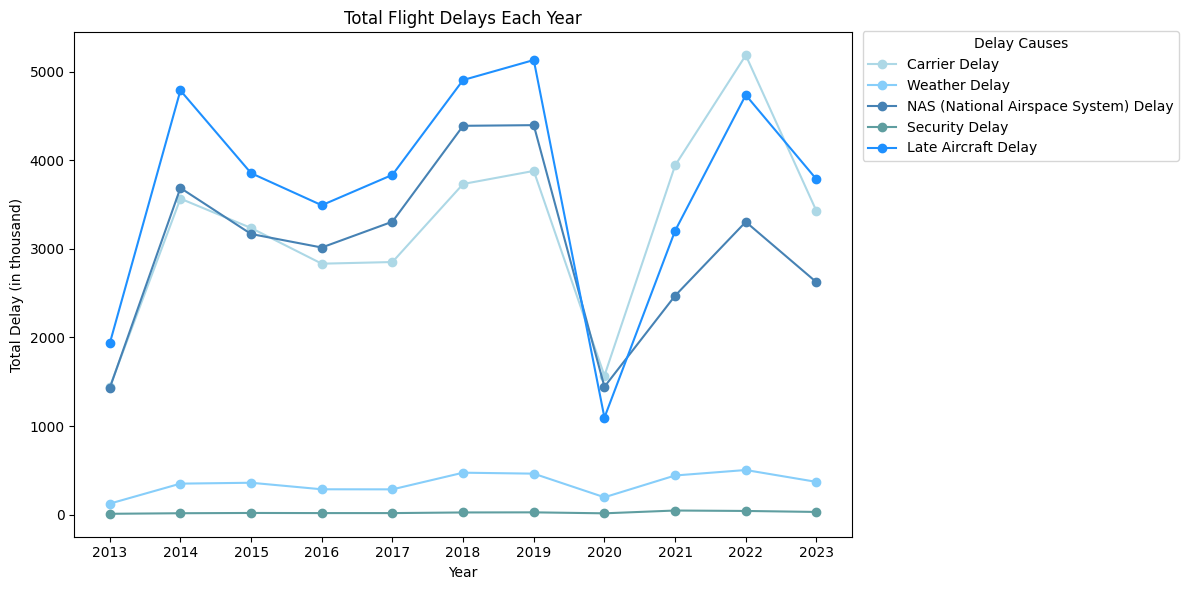

In [ ]:
# Seleksi data untuk grouping berdasarkan tahun
delay_per_year = airline_data.groupby('year')[[
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'security_ct',
    'late_aircraft_ct'
]].sum().reset_index()

# Mengubah nama kolom untuk memudahkan pemahaman
delay_per_year.rename(columns={
    "carrier_ct": "Carrier Delay",
    "weather_ct": "Weather Delay",
    "nas_ct": "NAS (National Airspace System) Delay",
    "security_ct": "Security Delay",
    "late_aircraft_ct": "Late Aircraft Delay"
}, inplace=True)

# Warna kustom
custom_colors = ['#ADD8E6', '#87CEFA', '#4682B4', '#5F9EA0', '#1E90FF']

# Plotting untuk visualisasi data
plt.figure(figsize=(12, 6))

for idx, column in enumerate(delay_per_year.columns[1:]):
    # Membagi nilai delay dengan 100 agar ditampilkan dalam ribuan
    plt.plot(delay_per_year['year'], delay_per_year[column] / 100,
             marker='o', label=column, color=custom_colors[idx])

plt.title('Total Flight Delays Each Year')
plt.xlabel('Year')
plt.ylabel('Total Delay (in thousand)')
plt.legend(title="Delay Causes", bbox_to_anchor=(1.005, 1.016), loc='upper left')

years = list(range(2013, 2024))
plt.xticks(ticks=years)

plt.tight_layout()
plt.show()

# 2. Proporsi keseluruhan dari total penyebab keterlambatan
Menampilkan informasi terkait dengan proporsi total keseluruhan keterlambatan dalam penerbangan berdasarkan penyebab

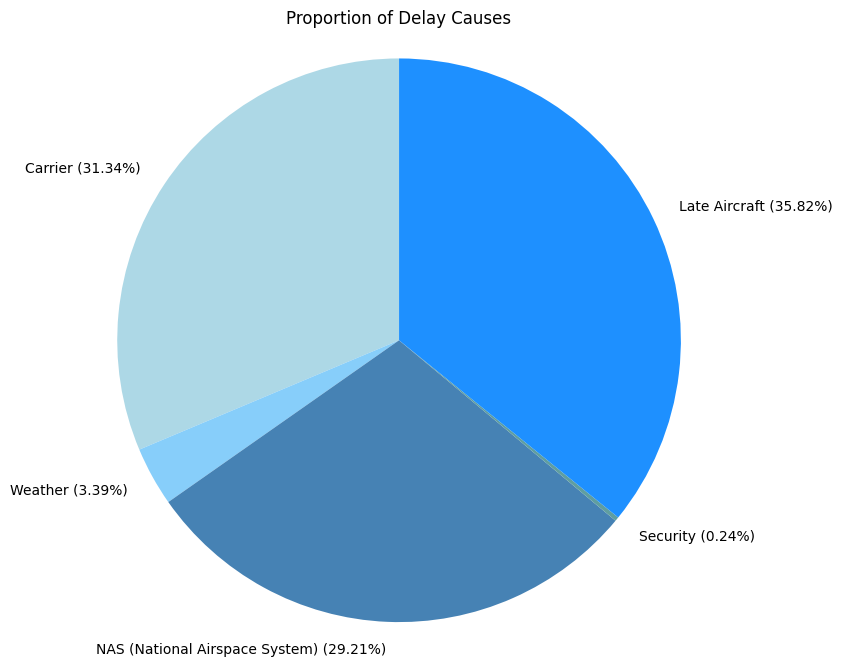

In [163]:
# Data yang sudah kamu siapkan sebelumnya
delay_total = airline_data[[
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'security_ct',
    'late_aircraft_ct'
]].sum().reset_index()

# Mengubah nama kolom untuk memudahkan pemahaman
delay_total.rename(columns={'index': 'Penyebab'}, inplace=True)
delay_total['Penyebab'] = delay_total['Penyebab'].map({
    "carrier_ct": "Carrier",
    "weather_ct": "Weather",
    "nas_ct": "NAS (National Airspace System)",
    "security_ct": "Security",
    "late_aircraft_ct": "Late Aircraft"
})

# Hitung persentase dan ubah format
delay_total['percentage'] = (delay_total[0] / delay_total[0].sum()) * 100
delay_total['percentage'] = delay_total['percentage'].round(2).astype(str) + '%'

# Rename kolom dan atur index
delay_total.rename(columns={0: 'Total Delay'}, inplace=True)
delay_total = delay_total.set_index('Penyebab')
delay_total = delay_total[['Total Delay', 'percentage']]

# Warna kustom
custom_colors = ['#ADD8E6', '#87CEFA', '#4682B4', '#5F9EA0', '#1E90FF']

# Menampilkan pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    delay_total['Total Delay'],
    labels=[f"{label} ({pct})" for label, pct in zip(delay_total.index, delay_total['percentage'])],
    colors=custom_colors,
    autopct=None,  # Menghapus persentase di dalam pie
    startangle=90
)
plt.title('Proportion of Delay Causes')
plt.axis('equal')
plt.show()

## 3. Top 5 dan Worst 5 Rata-rata Persentase Keterlambatan per Maskapai (2013–2023)
Menampilkan Top 5 dan Worst 5 dari rata-rata persentase penyebab keterlambatan per maskapai pada tahun 2013 hingga 2023

carrier_name
Alaska Airlines Inc.    15.095363
Republic Airline        14.974600
Horizon Air             14.824521
Delta Air Lines Inc.    13.652907
Endeavor Air Inc.       13.531827
Name: arr_del15_percentage, dtype: float64


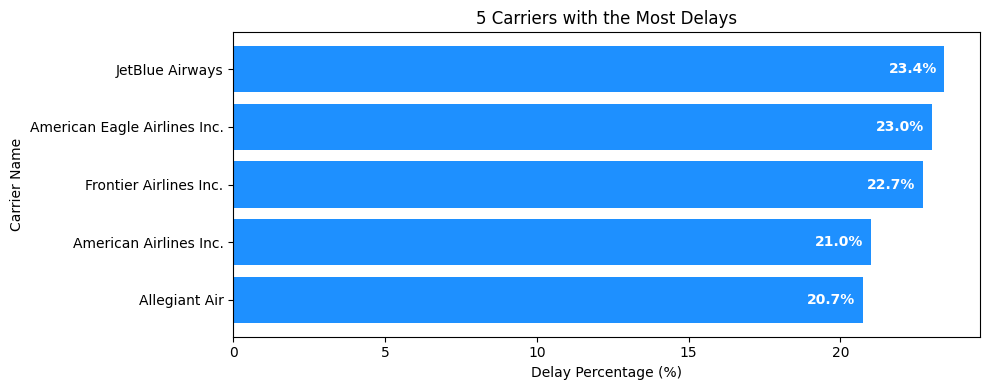

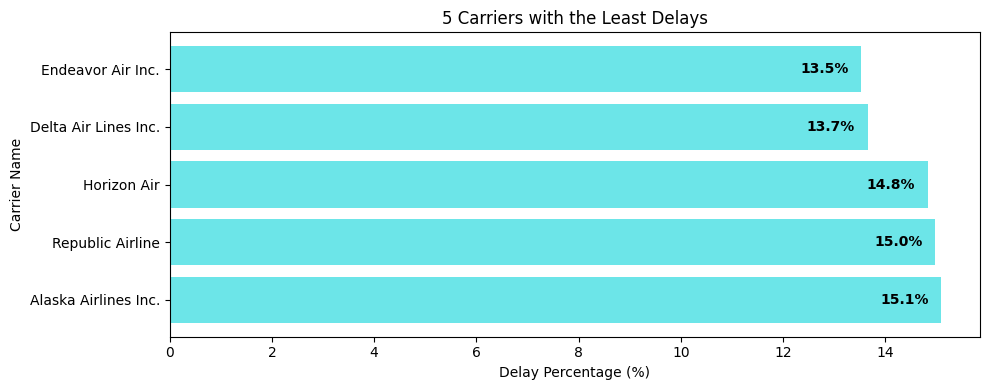

In [175]:
# Hitung rata-rata keterlambatan per maskapai
carrier_avg_delay = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values()

# Ambil 5 terbaik dan 5 terburuk
best_5 = carrier_avg_delay.head(5).sort_values(ascending=False)
print(best_5) # sort dari terendah ke tertinggi
worst_5 = carrier_avg_delay.tail(5)

# --- Plot untuk 5 Maskapai Terburuk ---
fig2, ax2 = plt.subplots(figsize=(10, 4))
bars2 = ax2.barh(worst_5.index, worst_5.values, color='#1E90FF')

# Tambahkan label di dalam batang dengan warna putih
for bar in bars2:
    width = bar.get_width()
    ax2.text(width - 0.25,  # posisikan sedikit ke kiri dari ujung kanan
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%',
             va='center', ha='right', fontsize=10, color='white', fontweight='bold') 

ax2.set_title('5 Carriers with the Most Delays')
ax2.set_xlabel('Delay Percentage (%)')
ax2.set_ylabel('Carrier Name')
plt.tight_layout()
plt.show()


# --- Plot untuk 5 Maskapai Terbaik ---
fig1, ax1 = plt.subplots(figsize=(10, 4))
bars1 = ax1.barh(best_5.index, best_5.values, color='#6CE5E8')

# Tambahkan label
for bar in bars1:
    width = bar.get_width()
    ax1.text(width - 0.25,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%',
             va='center', ha='right', fontsize=10, color='black', fontweight='bold') 

ax1.set_title('5 Carriers with the Least Delays')
ax1.set_xlabel('Delay Percentage (%)')
ax1.set_ylabel('Carrier Name')
plt.tight_layout()
plt.show()

````````````

## Selain data yang divisualisasikan, terdapat beberapa Ekplorasi Data lainnya yang dilakukan antara lain sebagai berikut.

````````````

## 1. Proporsi Penyebab Keterlambatan Penerbangan (2013–2023)
Menampilkan proporsi dari penyebab terjadinya keterlambatan dalam penerbangan di Amerika Serikat berdasarkan faktor penyebab selama jangka waktu tahun 2013 hingga 2023.

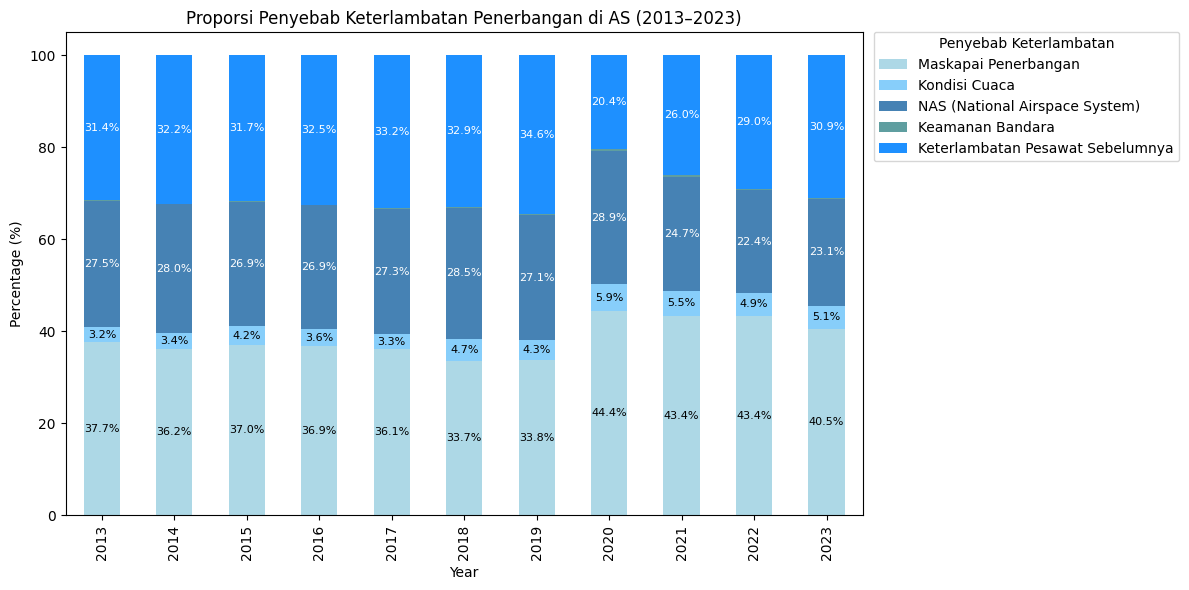

In [132]:
# Melakukan grouping data berdasarkan tahun dan menghitung rata-rata untuk setiap penyebab keterlambatan
grouped = airline_data.groupby("year")[["carrier_ct_percentage", "weather_ct_percentage", 
                              "nas_ct_percentage", "security_ct_percentage", 
                              "late_aircraft_ct_percentage"]].mean()

# Mengubah nama kolom untuk memudahkan pemahaman
grouped.rename(columns={
    "carrier_ct_percentage": "Maskapai Penerbangan",
    "weather_ct_percentage": "Kondisi Cuaca",
    "nas_ct_percentage": "NAS (National Airspace System)",
    "security_ct_percentage": "Keamanan Bandara",
    "late_aircraft_ct_percentage": "Keterlambatan Pesawat Sebelumnya"
}, inplace=True)

# Define custom colors for each cause of delay
custom_colors = ['#ADD8E6', '#87CEFA', '#4682B4', '#5F9EA0', '#1E90FF']

# Visualisasi data menggunakan matplotlib dengan warna kustom
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.title("Proporsi Penyebab Keterlambatan Penerbangan di AS (2013–2023)")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
# Change legend position to the right of the plot
plt.legend(title="Penyebab Keterlambatan", bbox_to_anchor=(1.005, 1.016), loc='upper left')
plt.tight_layout()

# Menambahkan persentase
for i, year in enumerate(grouped.index):
    cumulative = 0
    for col in grouped.columns:
        value = grouped.loc[year, col]
        # Check for NAS and Keterlambatan Pesawat Sebelumnya columns
        text_color = 'black'  # Default text color
        if col in ['NAS (National Airspace System)', 'Keterlambatan Pesawat Sebelumnya']:
            text_color = 'white'  # Set text color to white for NAS and Late Aircraft

        if value > 1:
            ax.text(
                i, cumulative + value / 2, 
                f"{value:.1f}%", 
                ha='center', va='center', fontsize=8, color=text_color, rotation=0
            )
        cumulative += value

plt.show()

## 2. Tren dari gangguan operasional penerbangan di Amerika Serikat (2013-2023)
Menampilkan proporsi dari tren terjadinya gangguan operasional pada penerbangan di Amerika Serikat selama jangka waktu tahun 2013 hingga 2023.

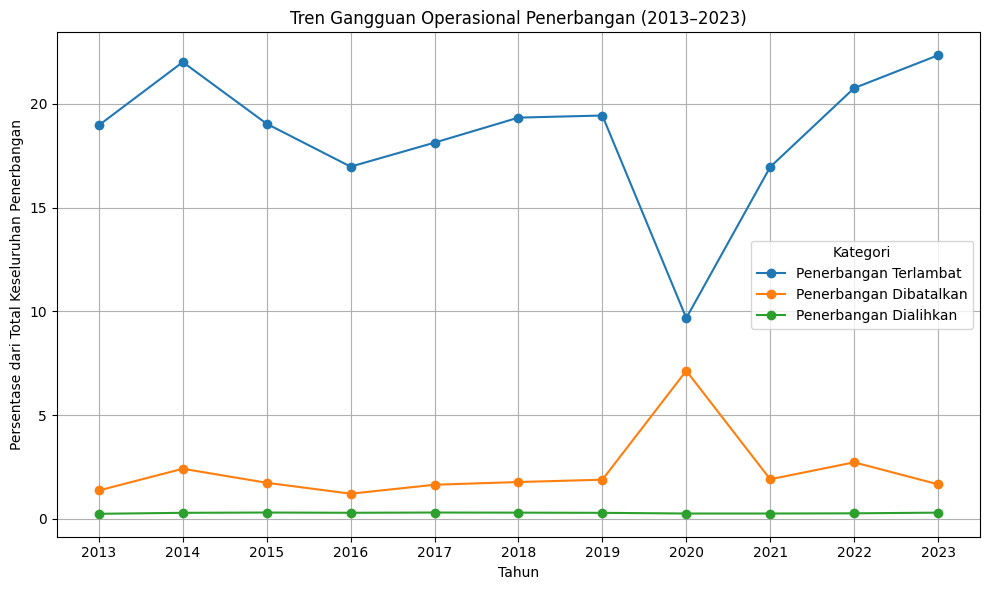

In [133]:
# Melakukan grouping data berdasarkan tahun dan menghitung rata-rata untuk setiap kategori gangguan operasional
summary = airline_data.groupby("year")[["arr_del15_percentage", "arr_cancelled_percentage", "arr_diverted_percentage"]].mean()

# Mengubah nama kolom untuk memudahkan pemahaman
summary.rename(columns={
    "arr_del15_percentage": "Penerbangan Terlambat",
    "arr_cancelled_percentage": "Penerbangan Dibatalkan",
    "arr_diverted_percentage": "Penerbangan Dialihkan"
}, inplace=True)

# Plot
ax = summary.plot(figsize=(10, 6), marker='o')
plt.title("Tren Gangguan Operasional Penerbangan (2013–2023)")
plt.ylabel("Persentase dari Total Keseluruhan Penerbangan")
plt.xlabel("Tahun")
plt.legend(title="Kategori")
plt.grid(True)

# Menampilkan semua tahun di sumbu-x
years = list(range(2013, 2024))
plt.xticks(ticks=years)

# Menambahkan label persentase di atas setiap titik data (Opsional)
# for col in summary.columns:
#     for x, y in zip(summary.index, summary[col]):
#         ax.text(x, y + 0.1, f"{y:.1f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## 3. Distribusi Persentase dari Penyebab Keterlambatan (dalam Menit) Penerbangan di AS pada Tahun 2023
Menampilkan distribusi dari persentase penyebab keterlambatan (dalam Menit) yang terjadi pada penerbangan di AS pada Tahun 2023

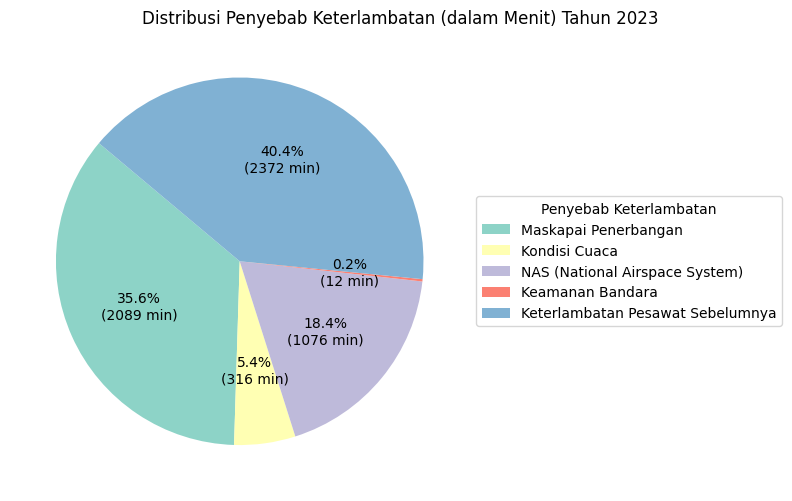

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Memilih tahun yang ingin ditampilkan
year_selected = 2023
df_year = airline_data[airline_data['year'] == year_selected]

# Ambil nilai rata-rata keterlambatan dalam menit untuk setiap penyebab
mean_delay_minutes = df_year[["carrier_delay", "weather_delay", "nas_delay", 
                              "security_delay", "late_aircraft_delay"]].mean()

# Ubah nama indeks agar lebih mudah dibaca
mean_delay_minutes.rename(index={
    "carrier_delay": "Maskapai Penerbangan",
    "weather_delay": "Kondisi Cuaca",
    "nas_delay": "NAS (National Airspace System)",
    "security_delay": "Keamanan Bandara",
    "late_aircraft_delay": "Keterlambatan Pesawat Sebelumnya"
}, inplace=True)

# Hitung total rata-rata keterlambatan kedatangan
total_minutes = df_year["arr_delay"].mean()
# Hitung persentase untuk masing-masing penyebab
percentages = (mean_delay_minutes / total_minutes) * 100

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    mean_delay_minutes,
    startangle=140,
    colors=plt.cm.Set3.colors
)

# Tambahkan label ke tengah irisan
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontalalignment = 'center'
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    
    ax.text(
        x * 0.6,
        y * 0.6,
        f"{percentages[i]:.1f}%\n({mean_delay_minutes[i]:.0f} min)",
        ha='center',
        va='center',
        fontsize=10,
    )

# Tambahkan legenda
ax.legend(
    wedges,
    mean_delay_minutes.index,
    title="Penyebab Keterlambatan",
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title(
    f"Distribusi Penyebab Keterlambatan (dalam Menit) Tahun {year_selected}",
    x=0.85,
)
plt.tight_layout()
plt.show()

## 4. Top 5 Rata-rata Persentase Keterlambatan per Bandara (2013–2023)
Menampilkan Top 5 dan Worst 5 dari rata-rata persentase penyebab keterlambatan per bandara pada tahun 2013 hingga 2023

airport_name
Cold Bay Airport    34.279514
Stockton Metro      33.360229
Topeka Regional     32.979145
Rafael Hernandez    32.303805
New Castle          31.644307
Name: arr_del15_percentage, dtype: float64


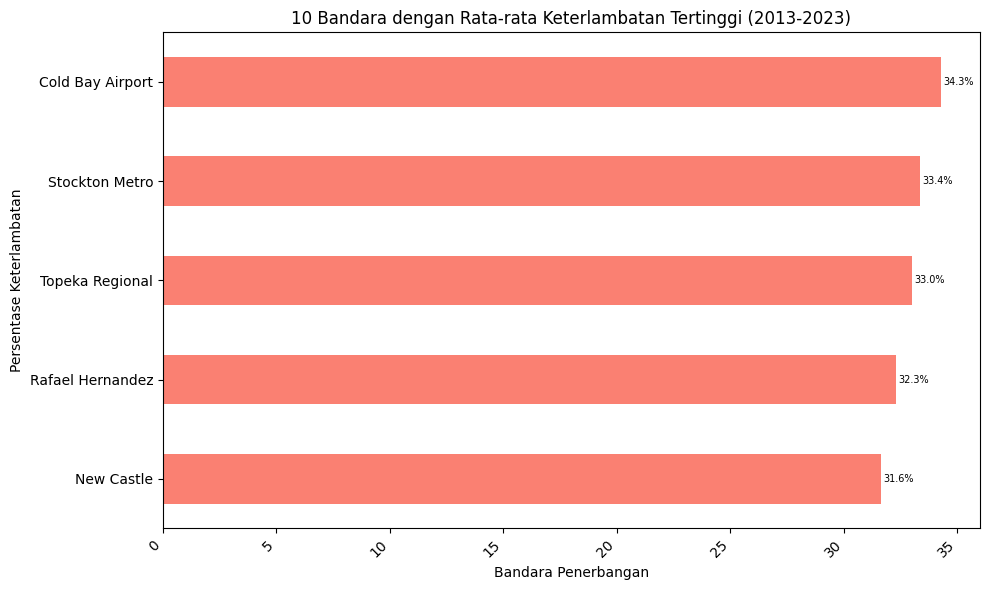

In [135]:
# Menentukan 10 bandara dengan rasio keterlambatan tertinggi (nanti olah datanya diskusi dulu mau diubah atogak)
# top_airports = airline_data.groupby('airport_name')['arr_del15_percentage'].mean().sort_values(ascending=False).head(10)
top_airports = airline_data.groupby('airport_name')['arr_del15_percentage'].mean().sort_values(ascending=False).iloc[1:6]
print(top_airports)

# Sorting the top airports by average delay percentage
top_airports = top_airports.sort_values(ascending=True)

# Plot bar chart
ax = top_airports.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('10 Bandara dengan Rata-rata Keterlambatan Tertinggi (2013-2023)')
plt.xlabel('Bandara Penerbangan')
plt.ylabel('Persentase Keterlambatan')
plt.xticks(rotation=45, ha='right')

# Menambahkan label persentase di atas setiap bar
for i, v in enumerate(top_airports):
    ax.text(v + 0.1, i, f"{v:.1f}%", color='black', va='center', fontsize=7)

plt.tight_layout()
plt.show()

## 5. Informasi 5 Maskapai dengan jumlah keterlambatan tertinggi dan penyebabnya pada tahun 2013 hingga 2023
Menampilkan distribusi dari jumlah keterlambatan tertinggi pada maskapai beserta penyebabnya dari tahun 2013 hingga 2023

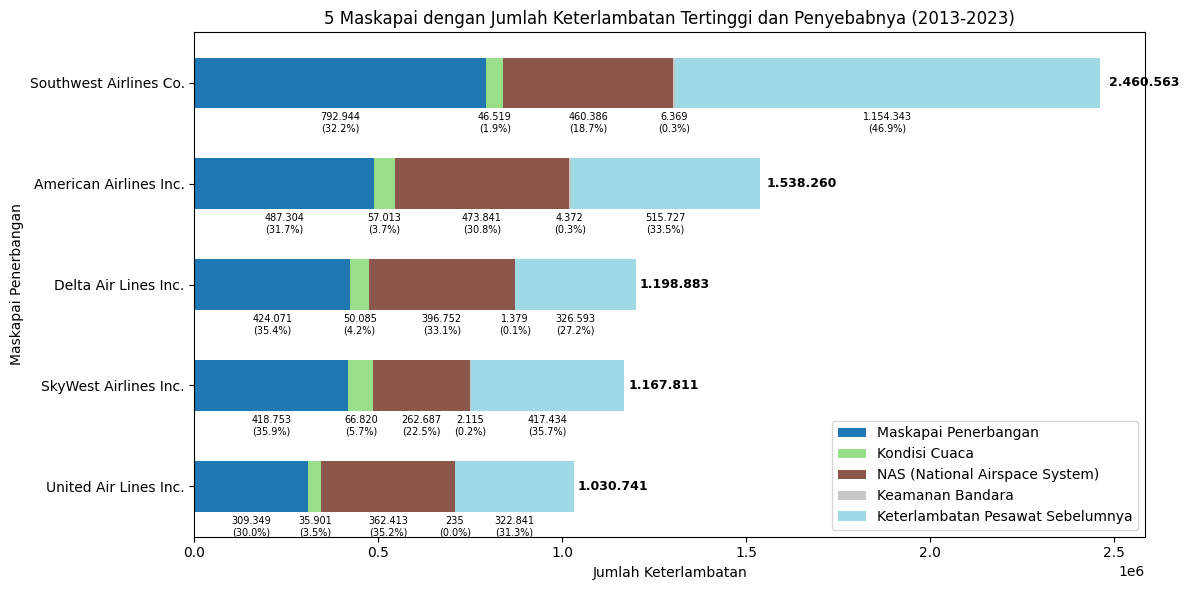

In [136]:
# Menentukan 5 maskapai dengan jumlah keterlambatan tertinggi
top_carriers = airline_data.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False)
df_top_carriers = airline_data[airline_data['carrier_name'].isin(top_carriers.index[:5])]

# Mengelompokkan dan menjumlahkan penyebab delay
carrier_stacked = df_top_carriers.groupby('carrier_name')[
    ['carrier_ct', 'weather_ct', 'nas_ct', 
     'security_ct', 'late_aircraft_ct']
].sum()

# Mengubah nama kolom untuk memudahkan pemahaman
carrier_stacked.rename(columns={
    "carrier_ct": "Maskapai Penerbangan",
    "weather_ct": "Kondisi Cuaca",
    "nas_ct": "NAS (National Airspace System)",
    "security_ct": "Keamanan Bandara",
    "late_aircraft_ct": "Keterlambatan Pesawat Sebelumnya"
}, inplace=True)

# Add percentage of total delays for each cause
carrier_stacked_percentage = carrier_stacked.div(carrier_stacked.sum(axis=1), axis=0) * 100

# Mengurutkan berdasarkan total delay dari semua penyebab
carrier_stacked['total'] = carrier_stacked.sum(axis=1)
carrier_stacked = carrier_stacked.sort_values(by='total', ascending=True)
total_values = carrier_stacked['total']  # Simpan total sebelum di-drop
carrier_stacked = carrier_stacked.drop(columns='total')

# Plot stacked bar chart
ax = carrier_stacked.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('5 Maskapai dengan Jumlah Keterlambatan Tertinggi dan Penyebabnya (2013-2023)')
plt.xlabel('Jumlah Keterlambatan')
plt.ylabel('Maskapai Penerbangan')

# Menambahkan nilai di dalam setiap segmen bar
for i, carrier in enumerate(carrier_stacked.index):
    left = 0
    for delay_type in carrier_stacked.columns:
        value = carrier_stacked.loc[carrier, delay_type]
        formatted_value = f"{int(value):,}".replace(",", ".")
        if value > 0:
            percentage = carrier_stacked_percentage.loc[carrier, delay_type]
            formatted_label = f"{formatted_value}\n({percentage:.1f}%)"
            ax.text(
                left + value / 2, i - 0.4,
                formatted_label,
                va='center', ha='center',
                fontsize=7, color='black'
            )
            left += value

    # Tambahkan total di kanan bar
    total = total_values.loc[carrier]
    formatted_total = f"{int(total):,}".replace(",", ".")
    ax.text(
        left + max(total * 0.01, 5000), i,
        formatted_total,
        va='center', ha='left',
        fontsize=9, color='black', fontweight='bold'
    )

plt.tight_layout()
plt.show()

## 6. Informasi 5 Maskapai dengan rasio keterlambatan tertinggi dan penyebabnya pada tahun 2013 hingga 2023
Menampilkan distribusi dari maskapai dengan rasio keterlambatan tertinggi beserta penyebabnya dari tahun 2013 hingga 2023

carrier_name
JetBlue Airways                 23.426057
American Eagle Airlines Inc.    23.018222
Frontier Airlines Inc.          22.727126
American Airlines Inc.          21.007740
Allegiant Air                   20.735554
Southwest Airlines Co.          20.541961
ExpressJet Airlines Inc.        20.449289
Spirit Air Lines                20.398747
United Air Lines Inc.           19.820651
Hawaiian Airlines Inc.          19.419924
Virgin America                  19.022492
Mesa Airlines Inc.              18.546812
ExpressJet Airlines LLC         18.237631
US Airways Inc.                 18.025224
AirTran Airways Corporation     17.886604
PSA Airlines Inc.               17.873584
Envoy Air                       17.817237
SkyWest Airlines Inc.           16.909415
Alaska Airlines Inc.            15.095363
Republic Airline                14.974600
Horizon Air                     14.824521
Delta Air Lines Inc.            13.652907
Endeavor Air Inc.               13.531827
Name: arr_del15_perce

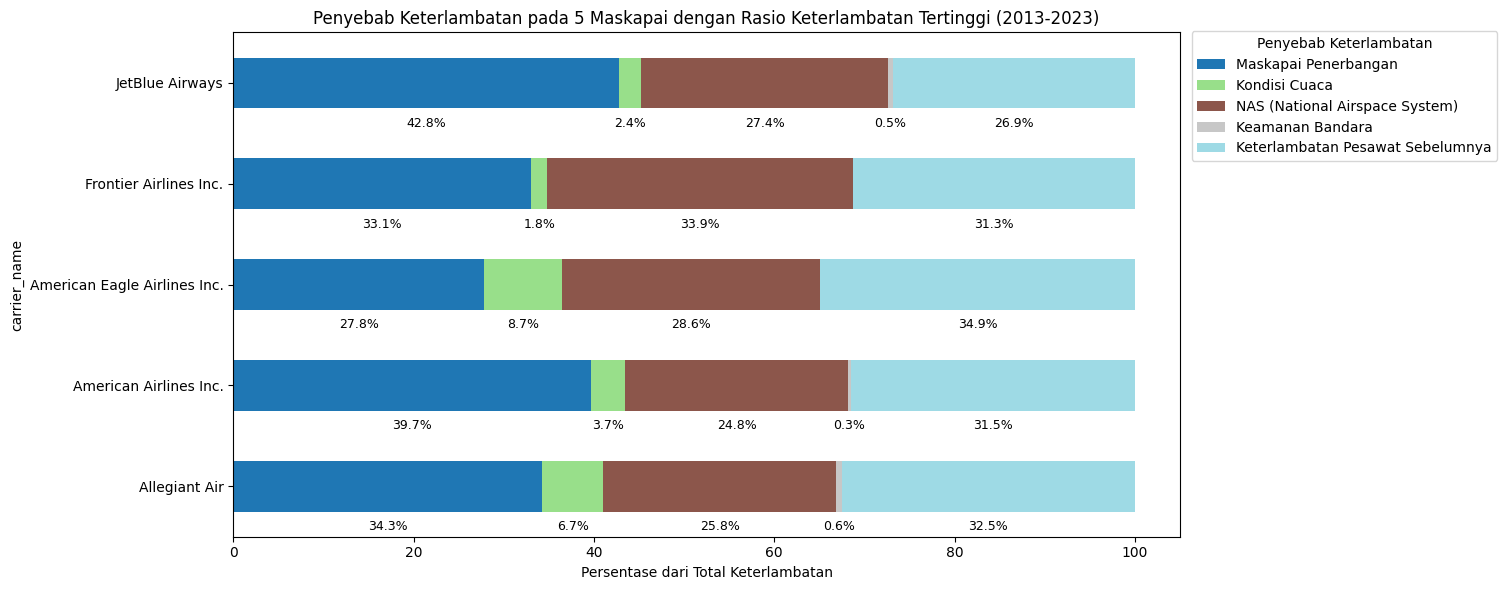

In [137]:
# Menentukan 5 maskapai dengan rasio keterlambatan tertinggi
top_carriers = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values(ascending=False)
print(top_carriers)
top_carriers = top_carriers.index[:5]
df_top_carriers = airline_data[airline_data['carrier_name'].isin(top_carriers)]

# Mengelompokkan dan menjumlahkan penyebab delay
carrier_stacked = df_top_carriers.groupby('carrier_name')[
    ['carrier_ct_percentage', 'weather_ct_percentage', 'nas_ct_percentage', 
     'security_ct_percentage', 'late_aircraft_ct_percentage']].mean()

# Mengubah nama kolom untuk memudahkan pemahaman
carrier_stacked.rename(columns={
    "carrier_ct_percentage": "Maskapai Penerbangan",
    "weather_ct_percentage": "Kondisi Cuaca",
    "nas_ct_percentage": "NAS (National Airspace System)",
    "security_ct_percentage": "Keamanan Bandara",
    "late_aircraft_ct_percentage": "Keterlambatan Pesawat Sebelumnya"
}, inplace=True)

# Plot batang horizontal bertumpuk
ax = carrier_stacked.plot(
    kind='barh', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='tab20'
)

plt.title('Penyebab Keterlambatan pada 5 Maskapai dengan Rasio Keterlambatan Tertinggi (2013-2023)')
plt.xlabel('Persentase dari Total Keterlambatan')
plt.tight_layout()

# Menambahkan label persentase pada setiap segmen batang
for i, (index, row) in enumerate(carrier_stacked.iterrows()):
    cumulative = 0
    for value, color in zip(row, ax.patches[i::len(carrier_stacked)]):
        width = value
        if width > 0.1:  # hanya tampilkan label jika signifikan
            ax.text(cumulative + width / 2, i - 0.4, f"{width:.1f}%", 
                    va='center', ha='center', fontsize=9, color='black')
        cumulative += width

plt.legend(title="Penyebab Keterlambatan", bbox_to_anchor=(1.005, 1.016), loc='upper left')
plt.show()

## 7. Korelasi antara jumlah penerbangan maskapai dengan rasio gangguan
Menampilkan korelasi antara jumlah penerbangan yang terjadi pada maskapai dengan rasio keterlambatan. Maskapai dianggap baik jika jumlah penerbangan yang dilakukan banyak tetapi hanya sedikit terjadi gangguan.

                                 flights  disruptions  performance_score
carrier_name                                                            
Delta Air Lines Inc.           8661561.0    13.652907           0.675886
Southwest Airlines Co.        12522217.0    20.541961           0.291493
SkyWest Airlines Inc.          6905056.0    16.909415           0.204857
Endeavor Air Inc.              1466178.0    13.531827           0.106856
Alaska Airlines Inc.           1990957.0    15.095363          -0.008776
Republic Airline               1717781.0    14.974600          -0.018638
American Airlines Inc.         7973061.0    21.007740          -0.123079
Horizon Air                     200419.0    14.824521          -0.126047
United Air Lines Inc.          5464237.0    19.820651          -0.205773
Envoy Air                      2073685.0    17.817237          -0.277190
PSA Airlines Inc.              1326337.0    17.873584          -0.343258
US Airways Inc.                 784157.0    18.0252

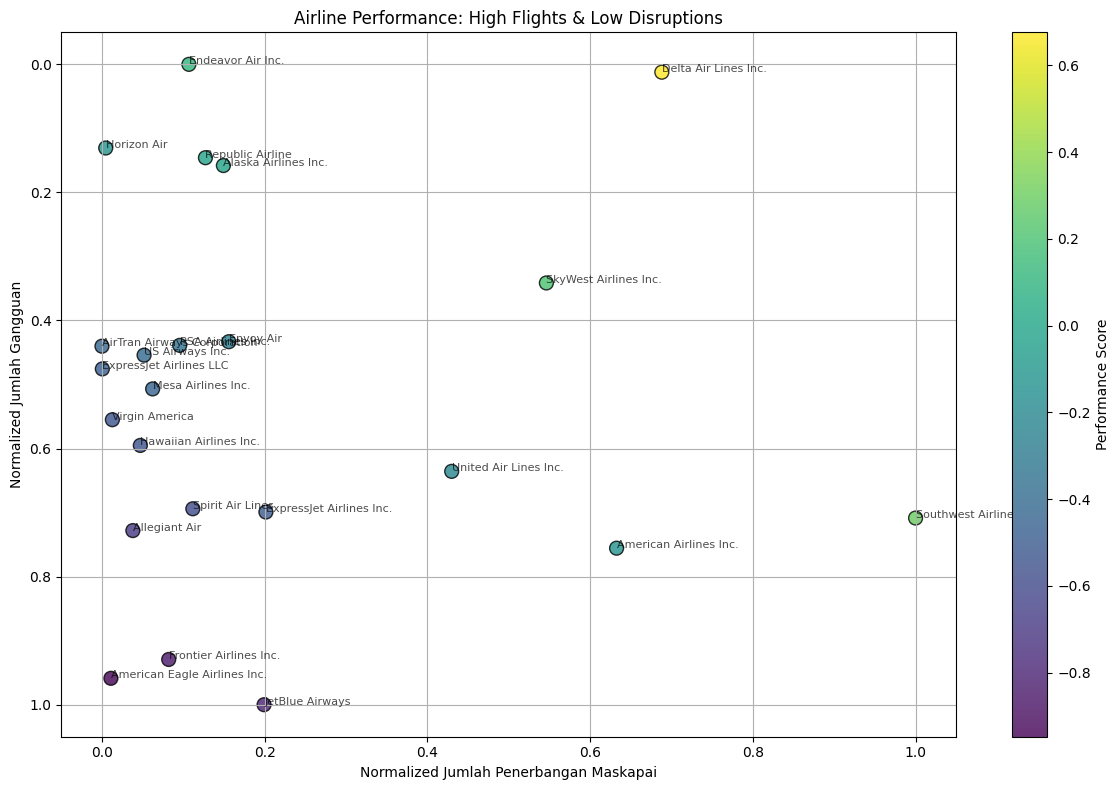

In [138]:
# Agregasi Data
most_flights = airline_data.groupby('carrier_name')['arr_flights'].sum()
delays = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean()
cancellations = airline_data.groupby('carrier_name')['arr_cancelled_percentage'].mean()
diversions = airline_data.groupby('carrier_name')['arr_diverted_percentage'].mean()
total_disruptions = delays

# Kombinasikan data dalam satu DataFrame
df = pd.DataFrame({
    'flights': most_flights,
    'disruptions': total_disruptions
})

# Melakukan Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
df[['flights_norm', 'disruptions_norm']] = scaler.fit_transform(df[['flights', 'disruptions']])

# Menghitung skor performansi
df['performance_score'] = df['flights_norm'] - df['disruptions_norm']

# Informasi penerbangan yang terbaik
best_airlines = df.sort_values('performance_score', ascending=False)
print(best_airlines[['flights', 'disruptions', 'performance_score']])

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['flights_norm'], 
    df['disruptions_norm'], 
    c=df['performance_score'], 
    cmap='viridis', 
    s=100, 
    alpha=0.8, 
    edgecolors='black'
)
plt.gca().invert_yaxis()

# Detail Visualization
plt.colorbar(scatter, label='Performance Score')
plt.xlabel('Normalized Jumlah Penerbangan Maskapai')
plt.ylabel('Normalized Jumlah Gangguan')
plt.title('Airline Performance: High Flights & Low Disruptions')

# Menambahkan label
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['flights_norm'][i], df['disruptions_norm'][i]), fontsize=8, alpha=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Korelasi antara jumlah penerbangan bandara dengan rasio gangguan
Menampilkan korelasi antara jumlah penerbangan yang terjadi pada bandara dengan rasio keterlambatan. Bandara dianggap baik jika jumlah penerbangan yang dilakukan banyak tetapi hanya sedikit terjadi gangguan.

Total bandara yang memiliki performansi baik: 29
Total bandara yang ada di Amerika Serikat: 418
Persentase bandara yang memiliki performansi baik: 6.94%

                                                      flights  disruptions  \
airport_name                                                                 
Hartsfield-Jackson Atlanta International            3557460.0    18.554109   
Chicago O'Hare International                        2774102.0    20.030461   
Dallas/Fort Worth International                     2588687.0    19.830570   
Denver International                                2391883.0    19.835927   
Los Angeles International                           2017064.0    19.934851   
Charlotte Douglas International                     1671963.0    19.069226   
Phoenix Sky Harbor International                    1618391.0    18.755028   
George Bush Intercontinental/Houston                1459063.0    19.348402   
Detroit Metro Wayne County                          1309481.0    1

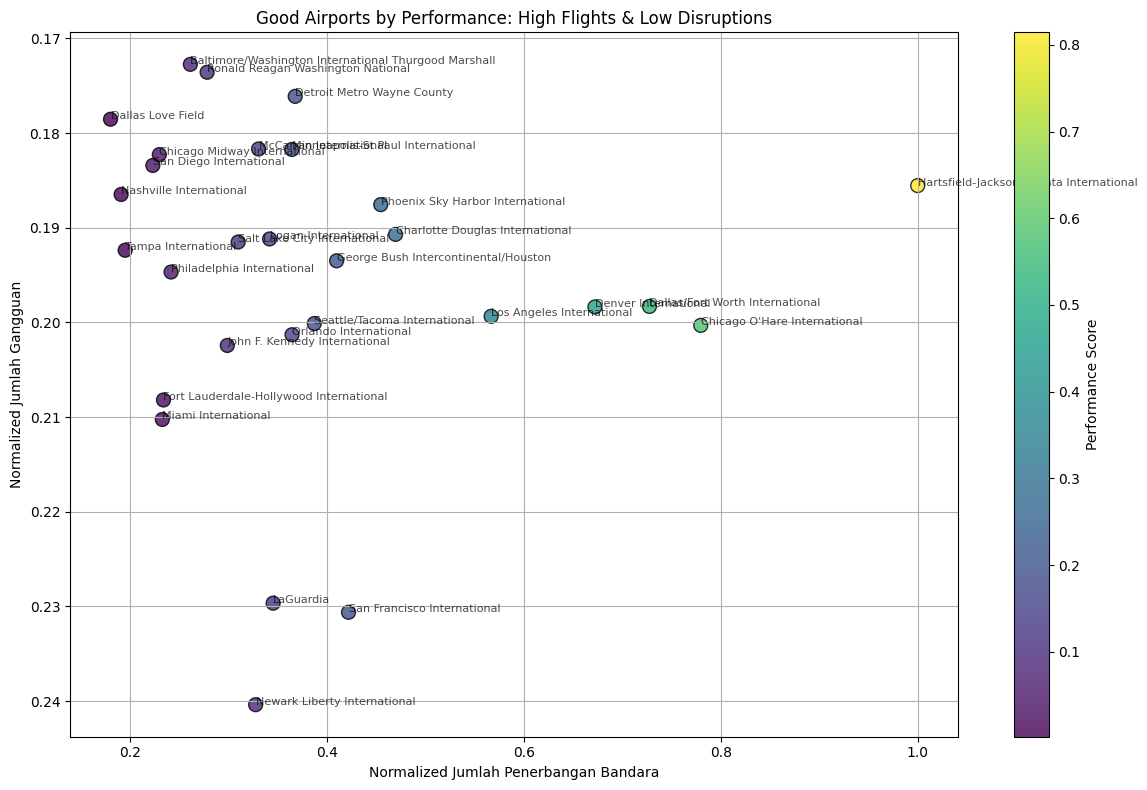

In [139]:
# Agregasi Data
most_flights = airline_data.groupby('airport_name')['arr_flights'].sum()
delays = airline_data.groupby('airport_name')['arr_del15_percentage'].mean()
cancellations = airline_data.groupby('airport_name')['arr_cancelled_percentage'].mean()
diversions = airline_data.groupby('airport_name')['arr_diverted_percentage'].mean()
total_disruptions = delays

# Kombinasikan data dalam satu DataFrame
df = pd.DataFrame({
    'flights': most_flights,
    'disruptions': total_disruptions
})

# Hapus data ketika jumlah penerbangan adalah 0
df = df[df['flights'] > 0]

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
df[['flights_norm', 'disruptions_norm']] = scaler.fit_transform(df[['flights', 'disruptions']])

# Hitung skor performansi
df['performance_score'] = df['flights_norm'] - df['disruptions_norm']

# Ambil bandara dengan nilai performansi lebih dari 0.001 (Threshold)
good_airport = df[df['performance_score'] > 0.001].sort_values(by='performance_score', ascending=False)

# Print informasi bandara yang memiliki performansi baik
print(f"Total bandara yang memiliki performansi baik: {len(good_airport)}")
# Print total bandara yang ada di Amerika Serikat
print(f"Total bandara yang ada di Amerika Serikat: {len(most_flights)}")
# Persentase bandara yang memiliki performansi baik
print(f"Persentase bandara yang memiliki performansi baik: {len(good_airport)/len(most_flights)*100:.2f}%\n")

# Tampilkan informasi penerbangan yang tergolong baik
print(good_airport[['flights', 'disruptions', 'performance_score']])

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    good_airport['flights_norm'], 
    good_airport['disruptions_norm'], 
    c=good_airport['performance_score'], 
    cmap='viridis', 
    s=100, 
    alpha=0.8, 
    edgecolors='black'
)
plt.gca().invert_yaxis()

# Detail Visualization
plt.colorbar(scatter, label='Performance Score')
plt.xlabel('Normalized Jumlah Penerbangan Bandara')
plt.ylabel('Normalized Jumlah Gangguan')
plt.title('Good Airports by Performance: High Flights & Low Disruptions')

# Menambahkan label
for i, txt in enumerate(good_airport.index):
    plt.annotate(txt, (good_airport['flights_norm'][i], good_airport['disruptions_norm'][i]), fontsize=8, alpha=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Tren antara Total Kedatangan, Keterlambatan, Pembatalan, dan Pengalihan Penerbangan (2013-2023)
Menampilkan tren antara Total Kedatangan, Keterlambatan, Pembatalan, dan Pengalihan pada Penerbangan dalam jangka waktu 2013-2023

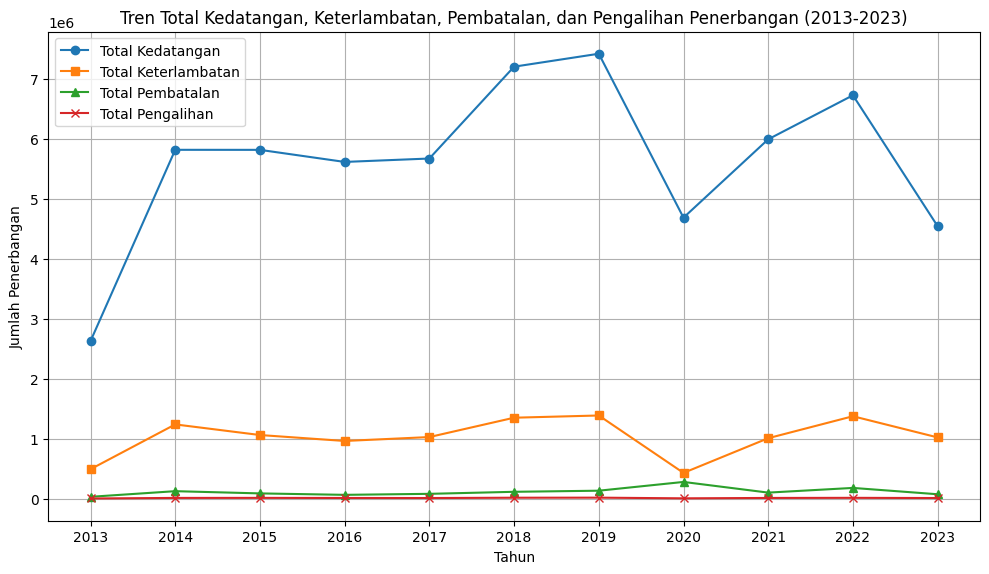

In [140]:
# Menghitung tren total kedatangan, keterlambatan, pembatalan, dan pengalihan penerbangan per tahun
trend = airline_data.groupby('year')[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum()

# Visualisasi tren menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.plot(trend.index, trend['arr_flights'], label='Total Kedatangan', marker='o')
plt.plot(trend.index, trend['arr_del15'], label='Total Keterlambatan', marker='s')
plt.plot(trend.index, trend['arr_cancelled'], label='Total Pembatalan', marker='^')
plt.plot(trend.index, trend['arr_diverted'], label='Total Pengalihan', marker='x')
plt.title('Tren Total Kedatangan, Keterlambatan, Pembatalan, dan Pengalihan Penerbangan (2013-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penerbangan')
plt.legend()
plt.grid(True)

# Menampilkan semua tahun di sumbu-x
years = list(range(2013, 2024))
plt.xticks(ticks=years)

plt.tight_layout()
plt.show()

## 10. Menghitung rasio rata-rata dari keterlambatan yang terjadi pada setiap negara bagian (2013-2023)
Melakukan perhitungan terhadap rasio rata-rata dari keterlambatan yang terjadi pada setiap negara bagian

In [141]:
# Hitung rata-rata keterlambatan per state
state_delay = airline_data.groupby('airport_state')['arr_del15_percentage'].mean().reset_index()

# Ubah singkatan state ke nama lengkap (jika mapping tersedia)
state_delay['airport_state_full'] = state_delay['airport_state'].map(state_abbrev_to_name)

# Urutkan dari yang tertinggi
state_delay = state_delay.sort_values(by='arr_del15_percentage', ascending=True)

# Tampilkan 5 data teratas
state_delay.head(5)

,airport_state,arr_del15_percentage,airport_state_full
13,ID,15.132892,Idaho
11,HI,15.388049,Hawaii
0,AK,15.624957,Alaska
26,MT,15.804956,Montana
53,WY,15.854092,Wyoming


## 11. Menampilkan rasio rata-rata keterlambatan penerbangan yang terjadi pada negara bagian (2013-2023)
Menampilkan rasio rata-rata dari keterlambatan yang terjadi pada setiap negara bagian dalam jangka waktu 2013-2023

In [142]:
# Visualisasi peta menggunakan Plotly
fig = go.Figure(data=go.Choropleth(
    locations=state_delay['airport_state'],  # State abbreviations, e.g. 'NY', 'CA'
    z=state_delay['arr_del15_percentage'],  # Values to be color-coded
    locationmode='USA-states',  # Match state abbreviations
    colorscale='Blues',
    colorbar_title="Persentase Keterlambatan",
    text=state_delay['airport_state_full'],  # Hover text
))

# Update layout for better visualization
fig.update_layout(
    title_text='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian (2013-2023)',
    geo_scope='usa',  # Limit map scope to USA
)

fig.show()

# fig = go.choropleth(state_delay,
#                     locations='airport_state',
#                     color='arr_del15_percentage',
#                     color_continuous_scale='Reds',
#                     scope='usa',
#                     labels={'arr_del15_percentage':'% Delay >15m'},
#                     title='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian')

# 12. Tren keterlambatan penerbangan pada bulan tertentu
Menampilkan informasi terkait dengan keterlambatan pesawat pada bulan tertentu untuk mengetahui saat kapan saja kegiatan penerbangan mengalami kesibukan dan keterlambatan

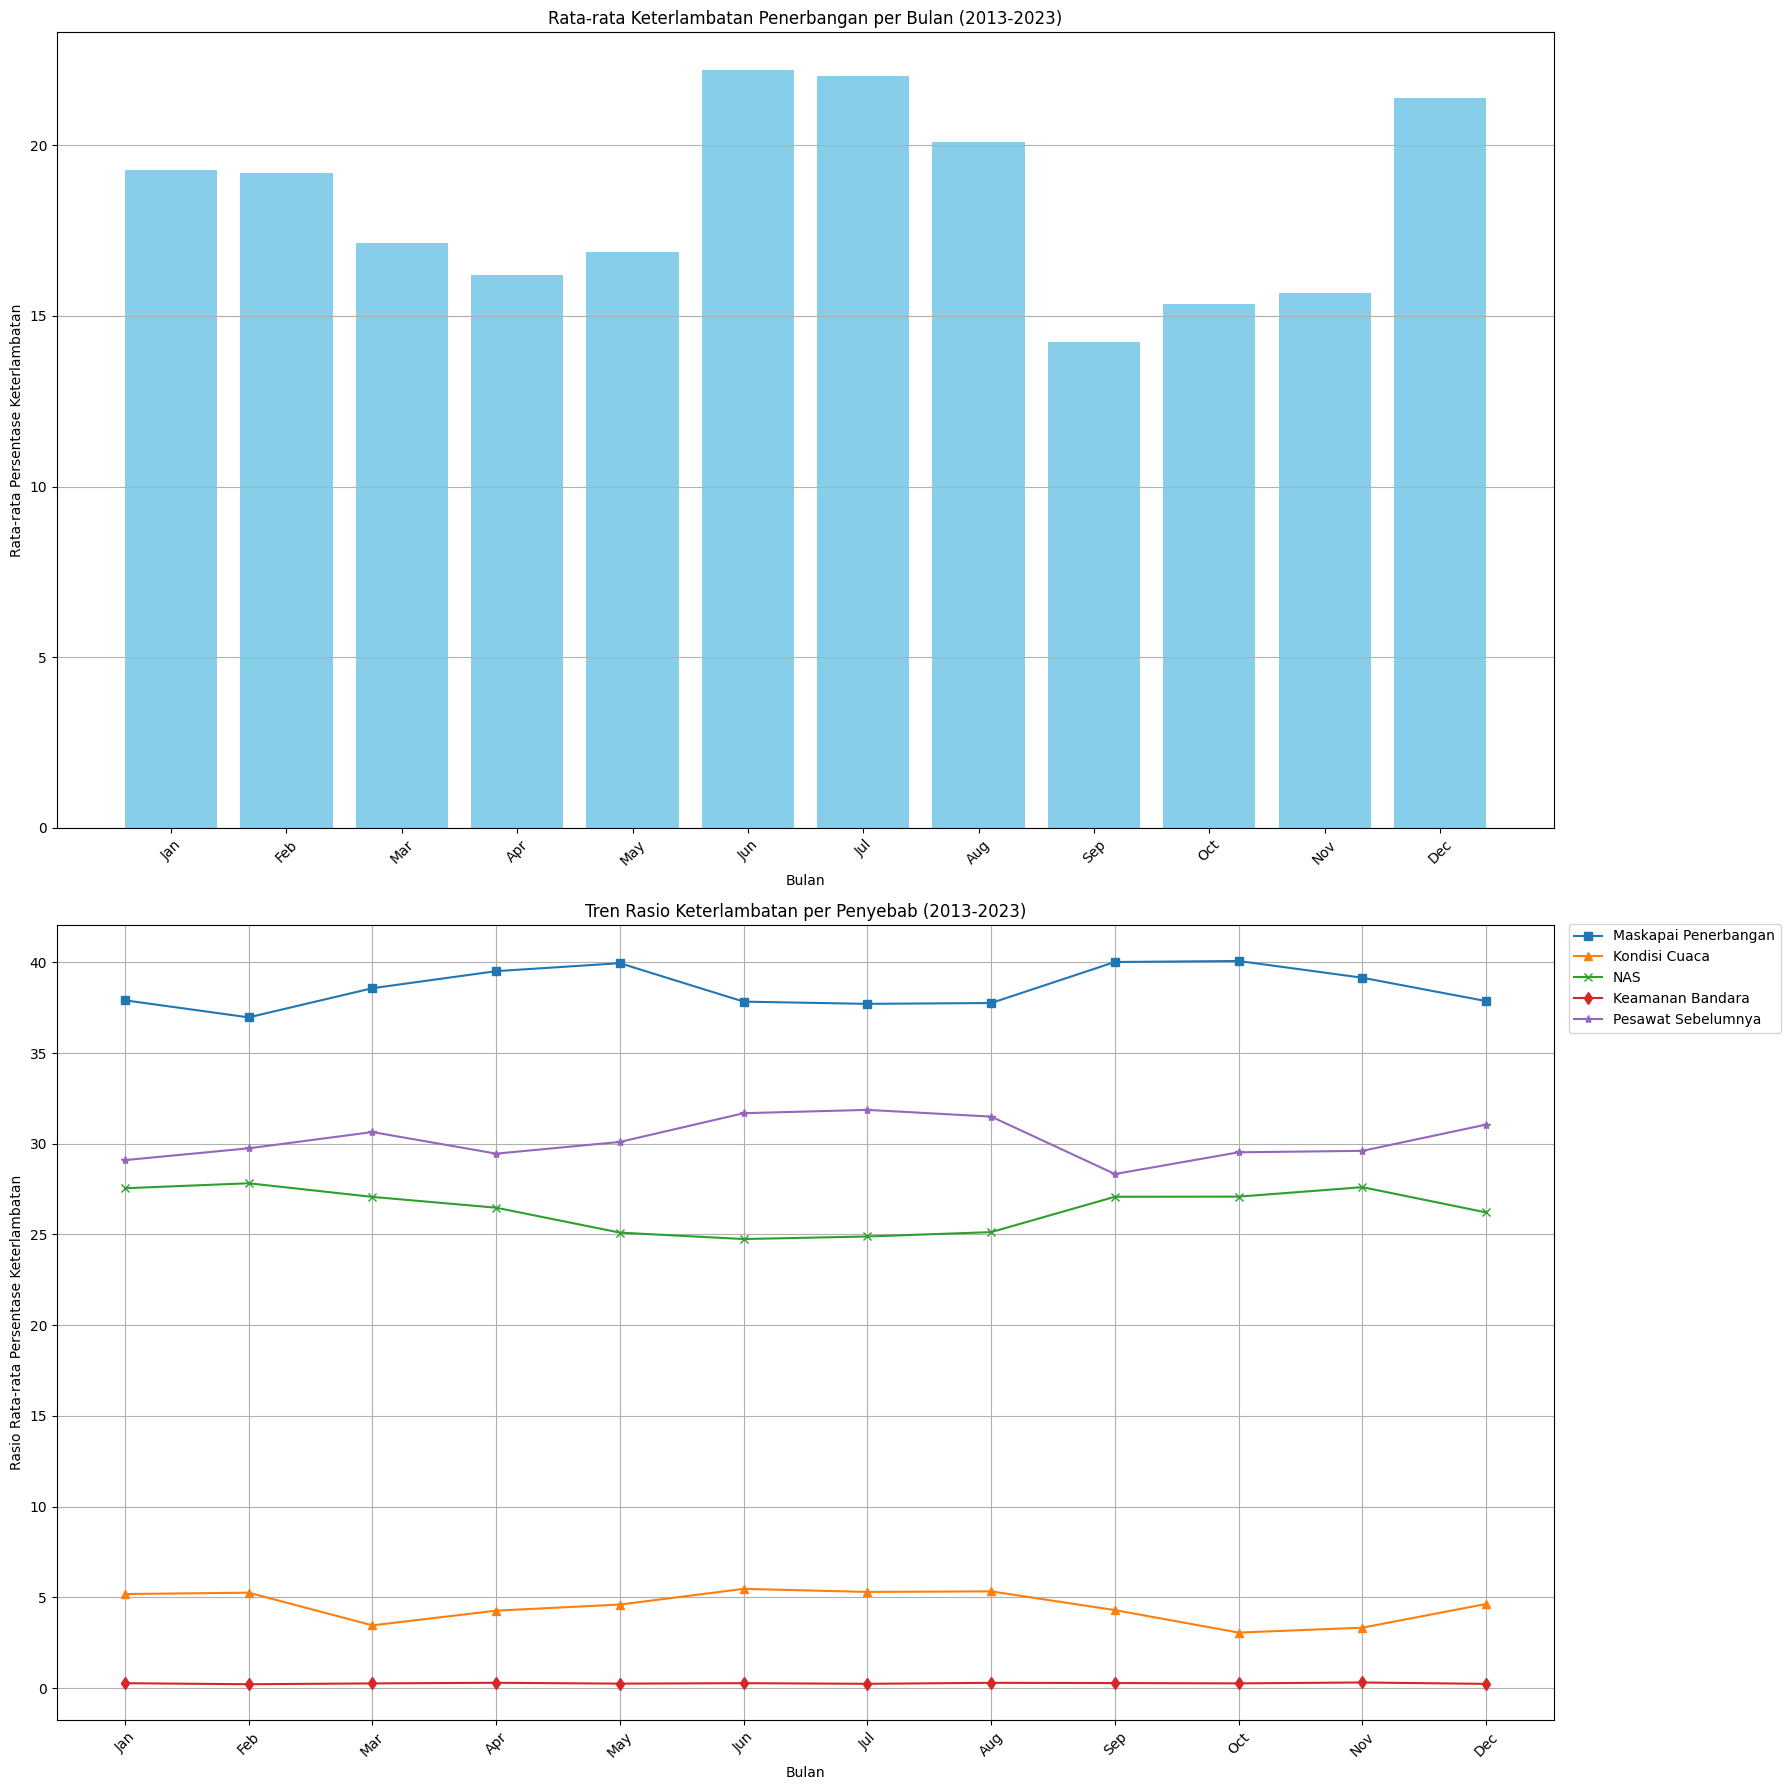

In [143]:
# Menghitung total kedatangan penerbangan per bulan
month_trend = airline_data.groupby('month')[['arr_del15_percentage','carrier_ct_percentage', 'weather_ct_percentage', 
     'nas_ct_percentage', 'security_ct_percentage', 
     'late_aircraft_ct_percentage']].mean().reset_index()
month_trend['month'] = month_trend['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Membuat subplots: 1 baris 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 18))

# --- Plot 1: Diagram batang untuk rata-rata keterlambatan per bulan ---
axes[0].bar(month_trend['month'], month_trend['arr_del15_percentage'], color='skyblue')
axes[0].set_title('Rata-rata Keterlambatan Penerbangan per Bulan (2013-2023)')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Rata-rata Persentase Keterlambatan')
axes[0].set_xticklabels(month_trend['month'], rotation=45)
axes[0].grid(axis='y')

# --- Plot 2: Garis untuk penyebab keterlambatan ---
axes[1].plot(month_trend['month'], month_trend['carrier_ct_percentage'], label='Maskapai Penerbangan', marker='s')
axes[1].plot(month_trend['month'], month_trend['weather_ct_percentage'], label='Kondisi Cuaca', marker='^')
axes[1].plot(month_trend['month'], month_trend['nas_ct_percentage'], label='NAS', marker='x')
axes[1].plot(month_trend['month'], month_trend['security_ct_percentage'], label='Keamanan Bandara', marker='d')
axes[1].plot(month_trend['month'], month_trend['late_aircraft_ct_percentage'], label='Pesawat Sebelumnya', marker='*')
axes[1].set_title('Tren Rasio Keterlambatan per Penyebab (2013-2023)')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Rasio Rata-rata Persentase Keterlambatan')
axes[1].legend(loc='upper left', bbox_to_anchor=(1.005, 1.01))
axes[1].set_xticklabels(month_trend['month'], rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()
